# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio




Com base em nosso dataframe iremos realizar alguns estudos;


**1. Previsão de Renda:** Dado o sexo, posse de veículo/imóvel, número de filhos, tipo de renda, educação, estado civil, tipo de residência, idade, tempo de emprego e quantidade de pessoas na residência, você pode construir um modelo de regressão para prever a renda de um cliente. Isso pode ser útil para entender os fatores que influenciam a renda e para fazer previsões sobre clientes potenciais.


**2. Segmentação de Clientes:** Você pode usar técnicas de agrupamento, como K-means, para segmentar seus clientes em diferentes grupos com base em suas características. Por exemplo, você pode identificar grupos de clientes com alta renda, clientes com muitos filhos, clientes jovens com alto tempo de emprego, etc. Isso pode ajudar a informar estratégias de marketing e vendas.


**3. Previsão de Propriedade de Veículo/Imóvel:** Com base nas características dos clientes, você pode construir um modelo de classificação para prever se um cliente possui um veículo ou imóvel. Isso pode ser útil para empresas que oferecem produtos ou serviços relacionados a veículos ou imóveis.


**4. Análise de Tendências Temporais:** Se a coluna ‘data_ref’ contém informações temporais, você pode analisar tendências ao longo do tempo. Por exemplo, você pode prever a renda média dos clientes ao longo do tempo, ou a proporção de clientes que possuem um veículo ao longo do tempo.

## Etapa 2 Crisp-DM: Entendimento dos dados
 abaixo segue uma preve tabela com algumas informações sobre os dados


### Dicionário de dados




| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência de coleta das variaveis         | string       |
| id_cliente              |  Codigo de identificação do cliente                 | float        |
| sexo                    |  Sexo do Cliente                                    | string       |
| posse_de_veiculo        |  Indica se o Cliente tem veículo                    | string       |
| posse_de_imovel         |  Indica se o Cliente tem imovel                     | string       |
| qtd_filhos              |  Indica a quantidade de filhos do cliente           | float        |
| tipo_renda              |  Tipo de Renda do CLiente                           | float        |
| educacao                |  Grau de escolaridade do cliente                    | string       |
| estado_civil            |  Estado civil do cliente                            | string       |
| tipo_residencia         |  Tipo de residencia do cliente                      | string       |
| idade                   |  Idade do cliente                                   | float        |
| tempo_emprego           |  Tempo de emprego atual do cliente                  | float        |
| qt_pessoas_residencia   |  Quantidade de pessoas que moram na residencia      | float        |
| renda                   |  Renda em reais                                     | float        |





#### Carregando os pacotes
Carregandos os pacotes que serão utilizados durante a contrução do projeto.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from seaborn import load_dataset
from ydata_profiling import ProfileReport
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as smf

%matplotlib inline


---

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [4]:
df_renda = pd.read_csv('previsao_de_renda.csv')
df_renda.head(200)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,2015-01-01,842,F,False,True,0,Pensionista,Primário,Casado,Casa,61,NaN,2.0,2463.31
196,196,2015-01-01,9516,M,False,False,0,Assalariado,Secundário,Solteiro,Com os pais,24,2.594521,1.0,4247.94
197,197,2015-01-01,8333,F,False,True,3,Empresário,Secundário,Solteiro,Casa,32,13.895890,4.0,7590.52
198,198,2015-01-01,8554,F,False,True,1,Assalariado,Superior completo,Casado,Casa,50,27.654795,3.0,3792.52


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

Para nós auxiliar melhor nesse entendimento, iremos utilizar o pacote ProfileReport pois ele nós retorna uma breve analise dos dados do nosso dataframe df_renda.

In [5]:
prof = ProfileReport(df_renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Agora vamos salvar essas informações em formato de pagina ou seja em html

In [6]:
pasta = 'analise_profile'
if not os.path.exists(pasta):
    os.makedirs(pasta)
file_path = os.path.join(pasta, 'renda_analisys.html')
prof.to_file(file_path)

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

----

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



### Limpando os dados

In [7]:
# Vendo o total de linhas e colunas:
df_renda.shape

(15000, 15)

In [8]:
# Verificando os dados ausentes por coluna:
df_renda.isna().sum()

Unnamed: 0                  0
data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

**OBS:** Podemos notar que na coluna tempo_emprego temos um total de 2573 linhas em branco. Agora teremos que entener o porque desses missings e determinar qual a melhor maneira de trabalhar com eles.

In [9]:
# Calculando a porcentagem de missings que está presente na coluna tempo_emprego:

porcent_miss = df_renda['tempo_emprego'].isnull().mean() * 100
print(f'Porcentagem de valores ausentes na coluna {"tempo_emprego"} {porcent_miss:.2f}%')


Porcentagem de valores ausentes na coluna tempo_emprego 17.15%


**OBS:** Bom Com essas informações agora teremos que ver como tratar esses dados faltantes. Pensei em dois metodos um seria aplicar a remoção dos 17.15% dos dados ausentes e ver se essa remoção vai prejudicar muito nossa anlise e a criação do nosso modelo. O Outro método que pensei foi ver a media dos dados e substituir no lugar do missings. Ambos os métodos teremos que analisar o impacto que irá trazer para a nossa analise. 

Após uma analíse decidir em optar pela remoção dos 17.15% dos dados ausentes, já que os dados ausentes estão de forma aleatoria e essa remoção não gerá-la um impcato em nosso modelo estatistico. Com isso irei remover todas as linhas com valores ausentes.

In [10]:
### Limpando os dados ausentes:
df_clean_renda = df_renda.dropna()
df_clean_renda.isna().sum()

Unnamed: 0               0
data_ref                 0
id_cliente               0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

In [11]:
df_clean_renda.dtypes

Unnamed: 0                 int64
data_ref                  object
id_cliente                 int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
dtype: object

In [51]:
df_clean_renda.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,res_log
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,4629.503560,0.059937
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,-7216.585325,NaN
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,1672.939105,0.831582
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,4592.539651,0.750283
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,-796.291759,NaN


In [53]:
# Removendo a coluna 'res_log'
df_clean_renda_sem_res_log = df_clean_renda.drop(columns=['res_log'])
df_clean_renda = df_clean_renda_sem_res_log
df_clean_renda.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,4629.503560
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,-7216.585325
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,1672.939105
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,4592.539651
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,-796.291759


In [54]:
# Salvando o dataframe em CSV:

# Cria o diretório 'dados' se ele não existir
if not os.path.exists('dados'):
    os.makedirs('dados')
    
df_clean_renda.to_csv('dados/df_renda_clean.csv', index=False)

Vamos aproveitar e tranforma a coluna data em datetime

In [12]:
df_clean_renda['data_ref'] = pd.to_datetime(df_clean_renda['data_ref'])
df_clean_renda.dtypes

C:\Users\Victor Gabriel\AppData\Local\Temp\ipykernel_14196\3668257706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_renda['data_ref'] = pd.to_datetime(df_clean_renda['data_ref'])


Unnamed: 0                        int64
data_ref                 datetime64[ns]
id_cliente                        int64
sexo                             object
posse_de_veiculo                   bool
posse_de_imovel                    bool
qtd_filhos                        int64
tipo_renda                       object
educacao                         object
estado_civil                     object
tipo_residencia                  object
idade                             int64
tempo_emprego                   float64
qt_pessoas_residencia           float64
renda                           float64
dtype: object

-----

### Entendimento dos dados - Bivariadas




Os dados bivariados referem-se ao estudo de duas variáveis para entender a relação entre elas. Utilizamos esse método para descobrir se existe uma associação entre duas variáveis e qual é a natureza dessa associação.

In [13]:
# Ciando uma copia do dataframe:
df1 = df_clean_renda.copy()
df1.head(3)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89


In [14]:
# Calculando a matriz:
# Criando variáveis dummy para o df1:
df_dummies_1 = pd.get_dummies(df1)
# Calculando a metriz de correlação 
corr_df1 = df_dummies_1.corr()
corr_df1

,Unnamed: 0,data_ref,id_cliente,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
Unnamed: 0,1.000000,0.997743,0.011793,-0.000033,-0.001636,-0.001255,-0.007238,0.004102,-0.002966,0.007686,...,-0.010988,0.005484,0.019076,0.011120,0.001942,-0.006856,0.002882,-0.005611,0.003499,0.008237
data_ref,0.997743,1.000000,0.010825,-0.000207,-0.000817,-0.001783,-0.006478,0.004817,-0.003561,0.008237,...,-0.011517,0.006043,0.019178,0.011620,0.002203,-0.006695,0.002479,-0.006515,0.002642,0.009076
id_cliente,0.011793,0.010825,1.000000,-0.025763,-0.093315,0.024052,-0.033226,-0.036373,0.036489,-0.018270,...,-0.029643,-0.014089,-0.013106,-0.025674,-0.023365,-0.011132,0.021174,0.015673,0.008544,-0.001752
posse_de_veiculo,-0.000033,-0.000207,-0.025763,1.000000,0.011342,0.085103,-0.109198,-0.076155,0.131266,0.083105,...,-0.093790,-0.076528,-0.061216,-0.060622,0.010056,-0.021560,0.013183,0.022464,0.036188,-0.011244
posse_de_imovel,-0.001636,-0.000817,-0.093315,0.011342,1.000000,0.007266,0.094254,0.009465,0.003925,0.015367,...,-0.030479,0.014496,-0.026072,0.031189,-0.027391,0.192272,-0.153161,-0.013694,-0.017423,-0.117041
qtd_filhos,-0.001255,-0.001783,0.024052,0.085103,0.007266,1.000000,-0.279069,-0.063220,0.902509,0.002192,...,-0.017828,-0.137948,-0.006728,-0.073803,-0.016034,0.004599,0.022076,-0.011188,0.011194,-0.027238
idade,-0.007238,-0.006478,-0.033226,-0.109198,0.094254,-0.279069,1.000000,0.321573,-0.253526,0.127069,...,0.081533,-0.076878,-0.063239,0.157728,-0.057862,0.115301,-0.163000,0.004648,0.012324,0.039650
tempo_emprego,0.004102,0.004817,-0.036373,-0.076155,0.009465,-0.063220,0.321573,1.000000,-0.065670,0.385013,...,0.027112,0.001953,-0.013919,0.031188,-0.044785,0.062624,-0.069504,-0.026384,0.016734,0.013136
qt_pessoas_residencia,-0.002966,-0.003561,0.036489,0.131266,0.003925,0.902509,-0.253526,-0.065670,1.000000,0.018683,...,-0.226183,-0.429424,0.056971,-0.199359,-0.029490,0.015195,0.008888,-0.011255,0.012425,-0.020004
renda,0.007686,0.008237,-0.018270,0.083105,0.015367,0.002192,0.127069,0.385013,0.018683,1.000000,...,-0.011293,-0.028065,-0.033828,-0.022990,-0.000717,0.014470,-0.028878,-0.013116,0.028391,0.005098


Agora iremos criar um código para classificar a correlação mais forte com a variável renda, utilizarei  a variavel renda como variável resposta. 

In [15]:
# Identificar as correlações mais forte com a variável:
strong_corr = corr_df1['renda'].abs().sort_values(ascending=False)
print("Correlação mais fortes com renda.")
print(strong_corr)

# Plotando as variáveis com correlação igual ou maior que 0.07
threshold = 0.07
strong_corr = strong_corr[strong_corr > threshold]
print("\nCorrelações mais fortes acima do limiar de", threshold)
strong_corr

Correlação mais fortes com renda.
renda                            1.000000
tempo_emprego                    0.385013
sexo_M                           0.265325
sexo_F                           0.265325
idade                            0.127069
posse_de_veiculo                 0.083105
estado_civil_Casado              0.054248
tipo_renda_Servidor público      0.042051
estado_civil_União               0.033828
educacao_Superior incompleto     0.029545
tipo_residencia_Com os pais      0.028878
tipo_residencia_Estúdio          0.028391
estado_civil_Solteiro            0.028065
estado_civil_Viúvo               0.022990
educacao_Superior completo       0.018961
qt_pessoas_residencia            0.018683
id_cliente                       0.018270
tipo_renda_Empresário            0.016260
posse_de_imovel                  0.015367
tipo_residencia_Casa             0.014470
tipo_residencia_Comunitário      0.013116
estado_civil_Separado            0.011293
educacao_Pós graduação           0.011118


renda               1.000000
tempo_emprego       0.385013
sexo_M              0.265325
sexo_F              0.265325
idade               0.127069
posse_de_veiculo    0.083105
Name: renda, dtype: float64

**OBS:**

Podemos analisar que a renda do cliente está relacionada com as seguintes variáveis; tempo_emprego, sexo, idade, posse_de_veiculo.

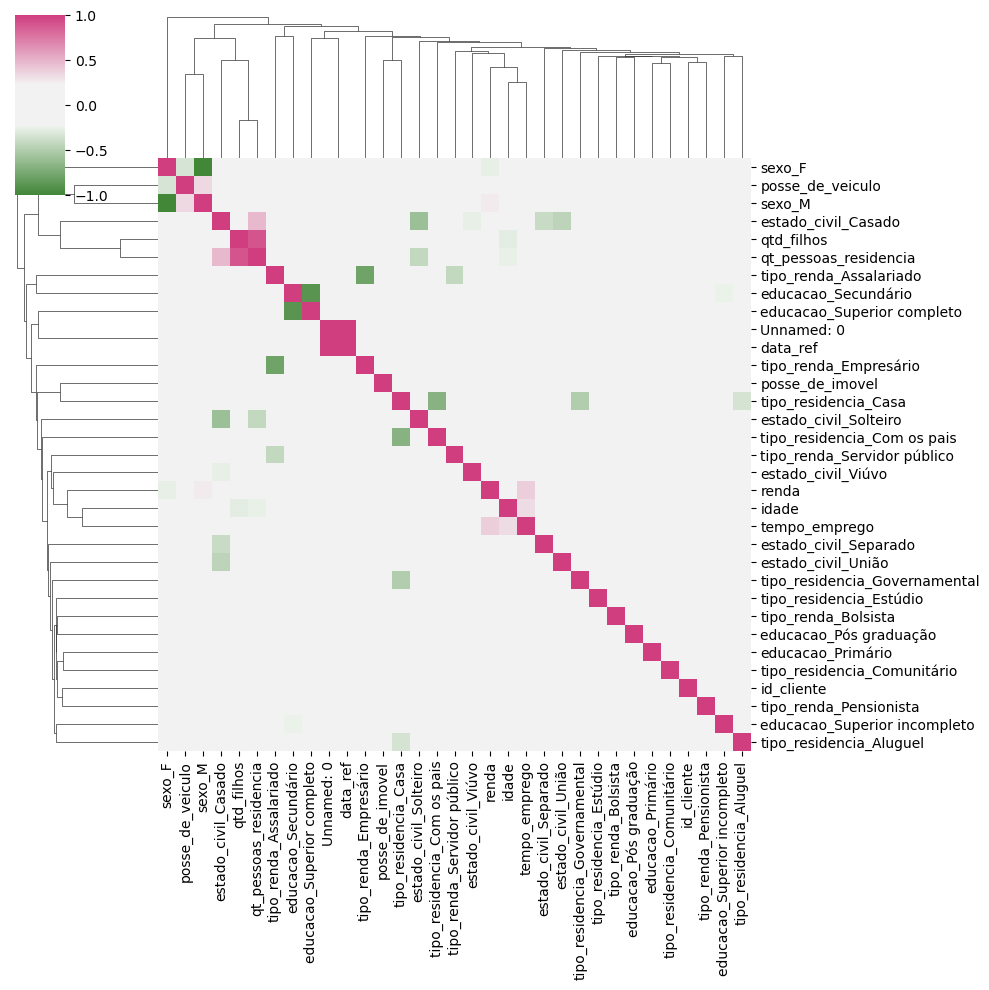

In [16]:
# Para entendermos a correlação dos dados vou utilizar a função do seboarn clustermap:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(corr_df1, figsize=(10, 10), center = 0, cmap=cmap)

-----

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


## **Primeiro modelo: Previsão de Renda.**


**1. Previsão de Renda:** Dado o sexo, posse de veículo/imóvel, número de filhos, tipo de renda, educação, estado civil, tipo de residência, idade, tempo de emprego e quantidade de pessoas na residência, você pode construir um modelo de regressão para prever a renda de um cliente. Isso pode ser útil para entender os fatores que influenciam a renda e para fazer previsões sobre clientes potenciais.

In [17]:
df_dummies_1

,Unnamed: 0,data_ref,id_cliente,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,0,2015-01-01,15056,False,True,0,26,6.602740,1.0,8060.34,...,False,True,False,False,False,True,False,False,False,False
1,1,2015-01-01,9968,True,True,0,28,7.183562,2.0,1852.15,...,False,False,False,False,False,True,False,False,False,False
2,2,2015-01-01,4312,True,True,0,35,0.838356,2.0,2253.89,...,False,False,False,False,False,True,False,False,False,False
3,3,2015-01-01,10639,False,True,1,30,4.846575,3.0,6600.77,...,False,False,False,False,False,True,False,False,False,False
4,4,2015-01-01,7064,True,False,0,33,4.293151,1.0,6475.97,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,14994,2016-03-01,11477,True,False,0,32,9.849315,2.0,1592.57,...,False,False,False,False,False,True,False,False,False,False
14995,14995,2016-03-01,16006,False,True,0,48,13.887671,1.0,7990.58,...,False,True,False,False,False,True,False,False,False,False
14997,14997,2016-03-01,6194,True,True,0,45,7.832877,2.0,604.82,...,False,False,False,False,False,True,False,False,False,False
14998,14998,2016-03-01,4922,True,False,0,36,4.298630,2.0,3352.27,...,False,False,False,False,False,True,False,False,False,False


In [55]:
# salvando em csv
df_dummies_1.to_csv('dados/df_dummies.csv', index=False)

In [18]:
# dataframe que iremos utilizar para a aprendizagem de maquina
df_dummies_1.dtypes

Unnamed: 0                                int64
data_ref                         datetime64[ns]
id_cliente                                int64
posse_de_veiculo                           bool
posse_de_imovel                            bool
qtd_filhos                                int64
idade                                     int64
tempo_emprego                           float64
qt_pessoas_residencia                   float64
renda                                   float64
sexo_F                                     bool
sexo_M                                     bool
tipo_renda_Assalariado                     bool
tipo_renda_Bolsista                        bool
tipo_renda_Empresário                      bool
tipo_renda_Pensionista                     bool
tipo_renda_Servidor público                bool
educacao_Primário                          bool
educacao_Pós graduação                     bool
educacao_Secundário                        bool
educacao_Superior completo              

In [19]:
# Criando um novo dataframe, onde não está incluido a coluna data_ref:
df_remove_data_ref = df_dummies_1.drop(columns=['data_ref'])
df_remove_data_ref

,Unnamed: 0,id_cliente,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_F,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,0,15056,False,True,0,26,6.602740,1.0,8060.34,True,...,False,True,False,False,False,True,False,False,False,False
1,1,9968,True,True,0,28,7.183562,2.0,1852.15,False,...,False,False,False,False,False,True,False,False,False,False
2,2,4312,True,True,0,35,0.838356,2.0,2253.89,True,...,False,False,False,False,False,True,False,False,False,False
3,3,10639,False,True,1,30,4.846575,3.0,6600.77,True,...,False,False,False,False,False,True,False,False,False,False
4,4,7064,True,False,0,33,4.293151,1.0,6475.97,False,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,14994,11477,True,False,0,32,9.849315,2.0,1592.57,False,...,False,False,False,False,False,True,False,False,False,False
14995,14995,16006,False,True,0,48,13.887671,1.0,7990.58,True,...,False,True,False,False,False,True,False,False,False,False
14997,14997,6194,True,True,0,45,7.832877,2.0,604.82,True,...,False,False,False,False,False,True,False,False,False,False
14998,14998,4922,True,False,0,36,4.298630,2.0,3352.27,False,...,False,False,False,False,False,True,False,False,False,False


**1. Regtessão Multipla**

In [20]:
reg = smf.ols('renda ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + qtd_filhos + C(tipo_renda) + C(educacao) + C(estado_civil) + C(tipo_residencia) + idade + tempo_emprego + qt_pessoas_residencia', data = df_clean_renda).fit()


In [21]:
df_clean_renda['res_log'] = reg.resid

reg.summary()

C:\Users\Victor Gabriel\AppData\Local\Temp\ipykernel_14196\2725118786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_renda['res_log'] = reg.resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     178.0
Date:                Sat, 11 May 2024   Prob (F-statistic):               0.00
Time:                        12:11:19   Log-Likelihood:            -1.2879e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12402   BIC:                         2.578e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                           -5626.6247   2500.235     -2.250      0.024   -1.05e+04    -725.776
C(sexo)[T.M]                         6052.8592    155.859     38.836      0.000    5747.352    6358.367
C(posse_de_veiculo)[T.True]            48.9098    150.374      0.325      0.745    -245.846     343.666
C(posse_de_imovel)[T.True]            366.5747    148.723      2.465      0.014      75.054     658.095
C(tipo_renda)[T.Bolsista]           -1357.7175   2564.833     -0.529      0.597   -6385.188    3669.753
C(tipo_renda)[T.Empresário]           823.1460    158.826      5.183      0.000     511.822    1134.470
C(tipo_renda)[T.Pensionista]        -2682.6331   2565.489     -1.046      0.296   -7711.391    2346.125
C(tipo_renda)[T.Servidor público]     137.0942    236.327      0.580      0.562    -326.143     600.332
C(educacao)[T.Pós graduação]         1090.5064   1690.396      0.645      0.519   -2222.932    4403.945
C(educacao)[T.Secundário]             607.3280    765.686      0.793      0.428    -893.536    2108.192
C(educacao)[T.Superior completo]     1225.5587    768.564      1.595      0.111    -280.947    2732.064
C(educacao)[T.Superior incompleto]    220.4722    827.097      0.267      0.790   -1400.767    1841.712
C(estado_civil)[T.Separado]          1161.1096   1182.969      0.982      0.326   -1157.693    3479.912
C(estado_civil)[T.Solteiro]           819.9016   1158.206      0.708      0.479   -1450.362    3090.165
C(estado_civil)[T.União]             -475.3334    267.717     -1.776      0.076   -1000.101      49.434
C(estado_civil)[T.Viúvo]             1053.5626   1229.396      0.857      0.391   -1356.245    3463.370
C(tipo_residencia)[T.Casa]           -298.3088    575.821     -0.518      0.604   -1427.008     830.390
C(tipo_residencia)[T.Com os pais]    -388.7990    641.844     -0.606      0.545   -1646.914     869.316
C(tipo_residencia)[T.Comunitário]    -459.8284   1120.521     -0.410      0.682   -2656.224    1736.567
C(tipo_residencia)[T.Estúdio]          77.2381   1056.186      0.073      0.942   -1993.051    2147.527
C(tipo_residencia)[T.Governamental]    73.8042    701.702      0.105      0.916   -1301.641    1449.249
qtd_filhos                          -1126.6107   1147.916     -0.981      0.326   -3376.703    1123.482
idade                                  42.0025      8.517      4.931      0.000      25.307      58.698
tempo_emprego                         554.7551     11.044     50.230      0.000     533.107     576.404
qt_pessoas_residencia                1269.8493   1145.868      1.108      0.268    -976.229    3515.928
==============================================================================
Omnibus:                    17568.773   Durbin-Watson:                   2.034
Prob(Omnibus)

In [22]:
# Analisando o P>|t| do modelo 
reg_summary = reg.summary()

# Extraindo os p-values
p_values = reg_summary.tables[1].data[1:]

# Convertendo os p-values para números
p_values = [float(p[4]) for p in p_values]

# Criando um DataFrame com os coeficientes e p-values
coef_table = pd.DataFrame({'Coefficient': reg.params, 'P-value': p_values}, index=reg.params.index)

# Filtrando as variáveis com P-value menor que 0.05
significant_vars = coef_table[coef_table['P-value'] < 0.05]

# Exibindo as variáveis significativas
print("Variáveis estatisticamente significativas:")
print(significant_vars)


Variáveis estatisticamente significativas:
                             Coefficient  P-value
Intercept                   -5626.624652    0.024
C(sexo)[T.M]                 6052.859235    0.000
C(posse_de_imovel)[T.True]    366.574684    0.014
C(tipo_renda)[T.Empresário]   823.145960    0.000
idade                          42.002548    0.000
tempo_emprego                 554.755139    0.000


**Analise:** Bom agora nós vamos ver se a variavel é estatisticamente significante para o modelo, temos que olhar a P>|t| se for menor que 5% a variavel é estatisticamente significante. com essa analise vamos descobrir quais variaveis vamos deixar no modelo.

**Separando apenas as variaveis que teve P>|t| menor que 5%, pois assim removeremos as variaveis não significantes para o nosso modelo.**

In [23]:
reg11 = smf.ols('renda ~ C(sexo) + C(posse_de_imovel) + tempo_emprego + C(tipo_renda) + idade' , data = df_clean_renda).fit()

In [24]:
df_clean_renda['res_log'] = reg11.resid

reg11.summary()

C:\Users\Victor Gabriel\AppData\Local\Temp\ipykernel_14196\988961680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_renda['res_log'] = reg11.resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     528.6
Date:                Sat, 11 May 2024   Prob (F-statistic):               0.00
Time:                        12:11:19   Log-Likelihood:            -1.2881e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12418   BIC:                         2.577e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                         -2481.0546    336.397     -7.375      0.000   -3140.445   -1821.664
C(sexo)[T.M]                       6091.0534    145.795     41.778      0.000    5805.273    6376.834
C(posse_de_imovel)[T.True]          386.3605    145.543      2.655      0.008     101.074     671.647
C(tipo_renda)[T.Bolsista]          -893.9027   2563.590     -0.349      0.727   -5918.936    4131.131
C(tipo_renda)[T.Empresário]         853.0427    157.504      5.416      0.000     544.311    1161.775
C(tipo_renda)[T.Pensionista]      -2579.2216   2562.352     -1.007      0.314   -7601.828    2443.385
C(tipo_renda)[T.Servidor público]   249.8860    234.926      1.064      0.287    -210.606     710.378
tempo_emprego                       554.9459     11.018     50.367      0.000     533.349     576.543
idade                                38.7817      7.838      4.948      0.000      23.419      54.145
==============================================================================
Omnibus:                    17545.490   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9801698.147
Skew:                           8.106   Prob(JB):                         0.00
Kurtosis:                     139.627   Cond. No.                     1.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Analise:** Bom após fazermos um modelo de regrssão linear multipla e deixarmos apenas as variaveis explicativas, agora vamos tentar melhorar o R-squared utilizando alguns métodos estátistico. Iremos aplicar esses métodos apenas na variavel resposta.

## **Graficos apenas com as variaveis que tem uma boa correlação**

C:\Users\Victor Gabriel\AppData\Local\Temp\ipykernel_14196\330642797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_renda['renda'] = reg11.resid


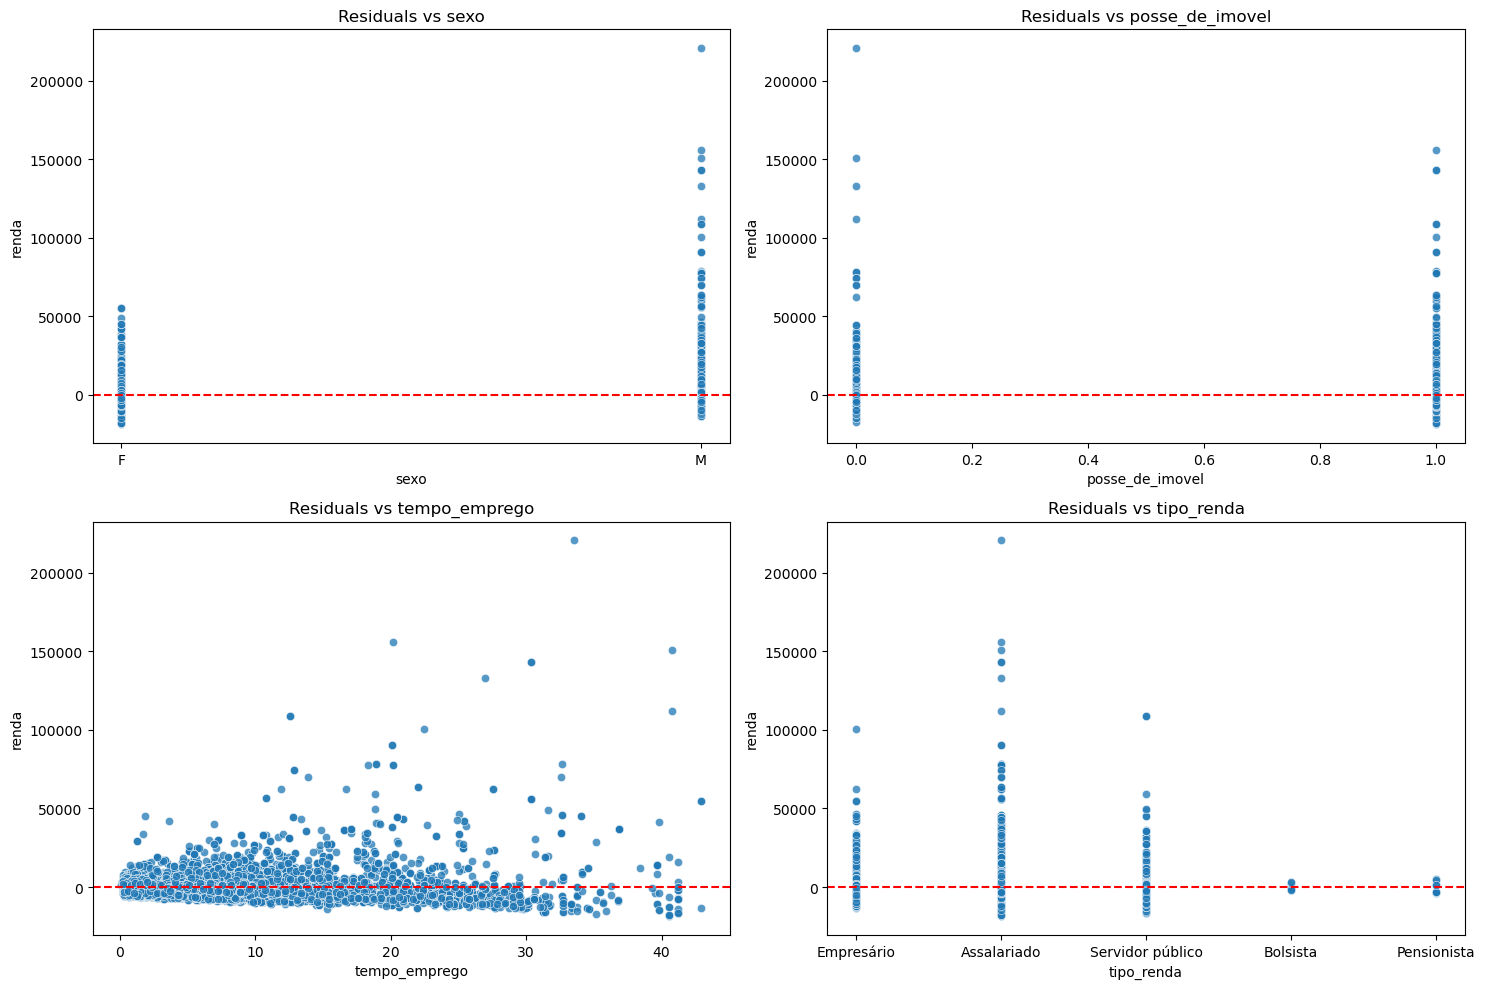

In [25]:
# Definindo a variável resposta como os resíduos do modelo
df_clean_renda['renda'] = reg11.resid

# Lista das variáveis para os gráficos
variables = ['sexo', 'posse_de_imovel', 'tempo_emprego', 'tipo_renda', 'idade']

# Criando uma figura com 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Gerando os gráficos
for var, ax in zip(variables, axs.flatten()):
    sns.scatterplot(x=var, y='renda', data=df_clean_renda, alpha=.75, ax=ax)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_title(f'Residuals vs {var}')

# Ajustando o layout
plt.tight_layout()
plt.show()


-----

### Rodando o modelo


In [26]:
# aplicando o polimonio de 2° Grau na variavel resposta.
reg2 = smf.ols('np.power(renda, 2) ~ C(sexo) + C(posse_de_imovel) + tempo_emprego + C(tipo_renda) + idade' , data = df_clean_renda).fit()

In [27]:
df_clean_renda['res_log'] = reg2.resid

reg2.summary()

C:\Users\Victor Gabriel\AppData\Local\Temp\ipykernel_14196\820964922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_renda['res_log'] = reg2.resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.power(renda, 2)   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     51.34
Date:                Sat, 11 May 2024   Prob (F-statistic):           2.39e-82
Time:                        12:11:20   Log-Likelihood:            -2.7042e+05
No. Observations:               12427   AIC:                         5.409e+05
Df Residuals:                   12418   BIC:                         5.409e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          -1.76e+08   2.99e+07     -5.883      0.000   -2.35e+08   -1.17e+08
C(sexo)[T.M]                       1.371e+08    1.3e+07     10.574      0.000    1.12e+08    1.63e+08
C(posse_de_imovel)[T.True]        -6.822e+06   1.29e+07     -0.527      0.598   -3.22e+07    1.86e+07
C(tipo_renda)[T.Bolsista]         -7.416e+07   2.28e+08     -0.325      0.745   -5.21e+08    3.73e+08
C(tipo_renda)[T.Empresário]       -3.043e+06    1.4e+07     -0.217      0.828   -3.05e+07    2.44e+07
C(tipo_renda)[T.Pensionista]       -4.52e+07   2.28e+08     -0.198      0.843   -4.92e+08    4.02e+08
C(tipo_renda)[T.Servidor público]  -3.33e+07   2.09e+07     -1.594      0.111   -7.43e+07    7.66e+06
tempo_emprego                      1.636e+07    9.8e+05     16.694      0.000    1.44e+07    1.83e+07
idade                               1.66e+06   6.97e+05      2.381      0.017    2.93e+05    3.03e+06
==============================================================================
Omnibus:                    36673.263   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2896062774.194
Skew:                          41.779   Prob(JB):                         0.00
Kurtosis:                    2366.498   Cond. No.                     1.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\Victor Gabriel\AppData\Local\Temp\ipykernel_14196\3344568769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_renda['renda'] = reg2.resid


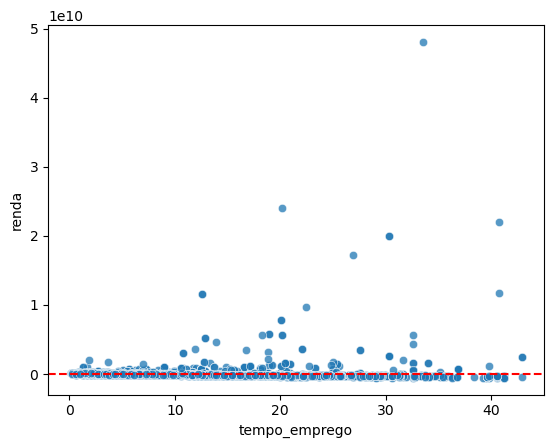

In [28]:
# Gerando um grafico de residuos sem aplicar a função de plomonio de 2° Grau na variavel resposta
df_clean_renda['renda'] = reg2.resid
sns.scatterplot(x = 'tempo_emprego', y = 'renda', data = df_clean_renda, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [29]:

reg21 = smf.ols('np.power(renda, 2) ~ C(sexo) + C(posse_de_imovel) + tempo_emprego + C(tipo_renda) + idade' , data = df_clean_renda).fit()

In [30]:
df_clean_renda['res_log'] = reg21.resid

reg21.summary()

C:\Users\Victor Gabriel\AppData\Local\Temp\ipykernel_14196\3350460598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_renda['res_log'] = reg21.resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.power(renda, 2)   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     9.281
Date:                Sat, 11 May 2024   Prob (F-statistic):           7.65e-13
Time:                        12:11:20   Log-Likelihood:            -5.7144e+05
No. Observations:               12427   AIC:                         1.143e+06
Df Residuals:                   12418   BIC:                         1.143e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                         -2.787e+18   9.91e+17     -2.813      0.005   -4.73e+18   -8.45e+17
C(sexo)[T.M]                       1.691e+18   4.29e+17      3.939      0.000     8.5e+17    2.53e+18
C(posse_de_imovel)[T.True]        -5.532e+17   4.29e+17     -1.291      0.197   -1.39e+18    2.87e+17
C(tipo_renda)[T.Bolsista]         -8.518e+17   7.55e+18     -0.113      0.910   -1.57e+19    1.39e+19
C(tipo_renda)[T.Empresário]       -2.413e+17   4.64e+17     -0.520      0.603   -1.15e+18    6.68e+17
C(tipo_renda)[T.Pensionista]      -5.106e+17   7.55e+18     -0.068      0.946   -1.53e+19    1.43e+19
C(tipo_renda)[T.Servidor público]  -9.15e+17   6.92e+17     -1.322      0.186   -2.27e+18    4.41e+17
tempo_emprego                      2.256e+17   3.25e+16      6.951      0.000    1.62e+17    2.89e+17
idade                              3.489e+16   2.31e+16      1.511      0.131   -1.04e+16    8.01e+16
==============================================================================
Omnibus:                    47462.105   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      39414315716.576
Skew:                          88.117   Prob(JB):                         0.00
Kurtosis:                    8725.899   Cond. No.                     1.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<span style="color:red">ESCREVER AQUI</span>


In [31]:
# Aplicando a função log na variavel renda
reg31 = smf.ols('np.log(renda + 0.1) ~ C(sexo) + C(posse_de_imovel) + tempo_emprego + C(tipo_renda) + idade' , data = df_clean_renda).fit()
df_clean_renda['res_log'] = reg31.resid

reg31.summary()

C:\Users\Victor Gabriel\AppData\Roaming\Python\Python39\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Victor Gabriel\AppData\Local\Temp\ipykernel_14196\1060216901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_renda['res_log'] = reg31.resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log(renda + 0.1)   R-squared:                       0.020
Model:                             OLS   Adj. R-squared:                  0.019
Method:                  Least Squares   F-statistic:                     13.05
Date:                 Sat, 11 May 2024   Prob (F-statistic):           8.53e-19
Time:                         12:11:20   Log-Likelihood:                -7879.8
No. Observations:                 5031   AIC:                         1.578e+04
Df Residuals:                     5022   BIC:                         1.584e+04
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            17.7195      0.077    230.500      0.000      17.569      17.870
C(sexo)[T.M]                          0.5439      0.064      8.554      0.000       0.419       0.668
C(posse_de_imovel)[T.True]            0.0438      0.035      1.238      0.216      -0.026       0.113
C(tipo_renda)[T.Bolsista]            -2.4749      0.821     -3.014      0.003      -4.085      -0.865
C(tipo_renda)[T.Empresário]           0.0099      0.036      0.275      0.784      -0.061       0.080
C(tipo_renda)[T.Pensionista]          0.5097      0.519      0.981      0.326      -0.509       1.528
C(tipo_renda)[T.Servidor público]    -0.0121      0.055     -0.221      0.825      -0.119       0.095
tempo_emprego                         0.0052      0.004      1.214      0.225      -0.003       0.014
idade                                -0.0009      0.002     -0.518      0.604      -0.004       0.003
==============================================================================
Omnibus:                      880.015   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3964.888
Skew:                          -0.784   Prob(JB):                         0.00
Kurtosis:                       7.056   Cond. No.                     2.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\Victor Gabriel\AppData\Local\Temp\ipykernel_14196\3172392946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_renda['renda'] = reg31.resid


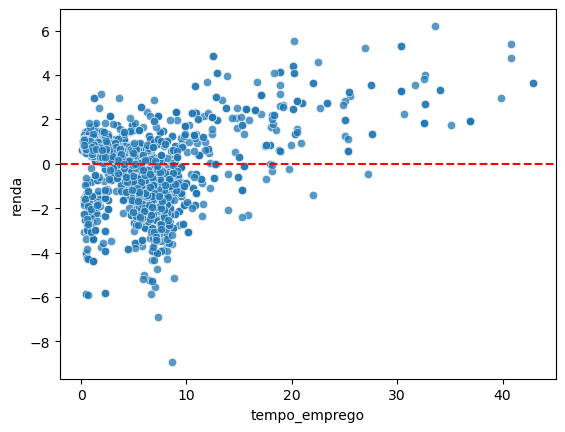

In [32]:
# Gerando um grafico de residuos aplicando a função de log na variavel resposta
df_clean_renda['renda'] = reg31.resid
sns.scatterplot(x = 'tempo_emprego', y = 'renda', data = df_clean_renda, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

C:\Users\Victor Gabriel\AppData\Local\Temp\ipykernel_14196\48553025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_renda['renda'] = reg31.resid


<AxesSubplot:xlabel='tempo_emprego', ylabel='renda'>

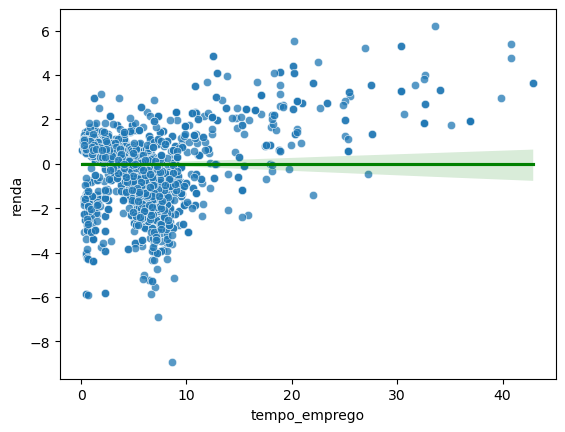

In [36]:
# Gerando um grafico de residuos aplicando a função de log na variavel resposta
df_clean_renda['renda'] = reg31.resid
sns.scatterplot(x = 'tempo_emprego', y = 'renda', data = df_clean_renda, alpha = .75)
# Adicionando uma linha de tendência
sns.regplot(x = 'tempo_emprego', y = 'renda', data = df_clean_renda, scatter=False, color='green')

## Etapa 5 Crisp-DM: Avaliação dos resultados


**ANALISE:**
Com base nas analises dos modelos é preferivel não aplicarmos nenhum método na variavel resposta, pois com isso irá diminuir o nosso R-squared. 

C:\Users\Victor Gabriel\AppData\Local\Temp\ipykernel_14196\3847120400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_renda['renda'] = reg11.resid


<AxesSubplot:xlabel='tempo_emprego', ylabel='renda'>

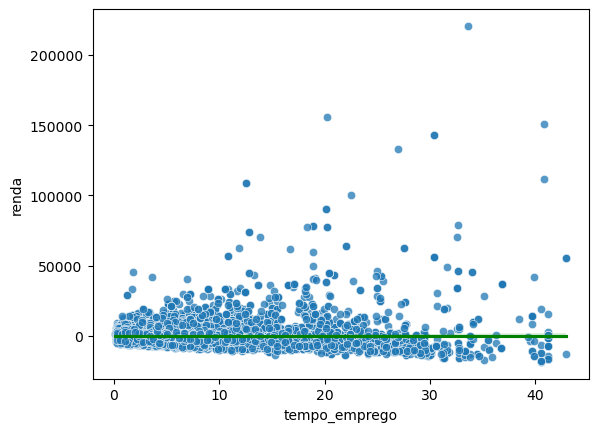

In [42]:
df_clean_renda['renda'] = reg11.resid
sns.scatterplot(x = 'tempo_emprego', y = 'renda', data = df_clean_renda, alpha = .75)
# Adicionando uma linha de tendência
sns.regplot(x = 'tempo_emprego', y = 'renda', data = df_clean_renda, scatter=False, color='green')

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.